In [5]:
##dependencies
import pandas as pd

# SQL Alchemy
#from config import Password
import sqlalchemy as sal

from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

In [6]:
# Bonus 1. Import SQL Database from mssql-server to pandas
engine = sal.create_engine('mssql://DESKTOP-LOB21VL\SQLEXPRESS/SQL_Database_Management_project?driver=ODBC+DRIVER+17+FOR+SQL+SERVER')
conn= engine.connect()

In [8]:
# Create data from SQL
salary_data = pd.read_sql("SELECT * FROM Salaries", conn)

In [12]:
# Check dataset
salary_data.head(5)

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


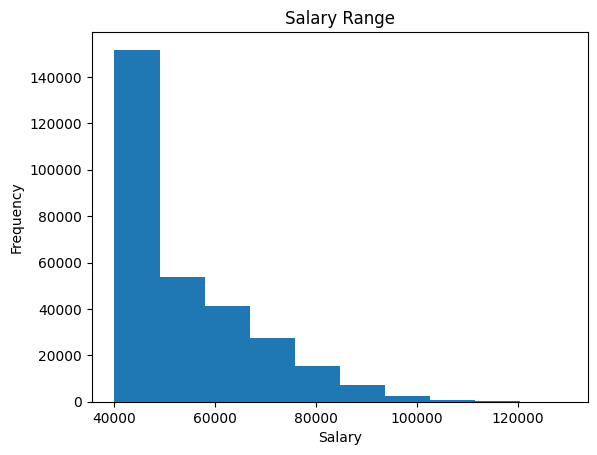

In [10]:
#Create a histogram to visualize the most common salary ranges for employees
plt.hist(salary_data['salary'])
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Salary Range")

plt.show()

In [17]:
salary_title_data = pd.read_sql(
    "SELECT AVG(CAST(s.salary AS FLOAT)) AS average_salary, t.title FROM Salaries AS s LEFT JOIN Employees AS e ON s.emp_no = e.emp_no LEFT JOIN Titles AS t ON t.title_id = e.emp_title_id GROUP BY t.title", conn)
salary_title_data.head()

,average_salary,title
0,48564.434447,Assistant Engineer
1,48535.336511,Engineer
2,48506.799871,Senior Engineer
3,51531.041667,Manager
4,58465.382850,Staff


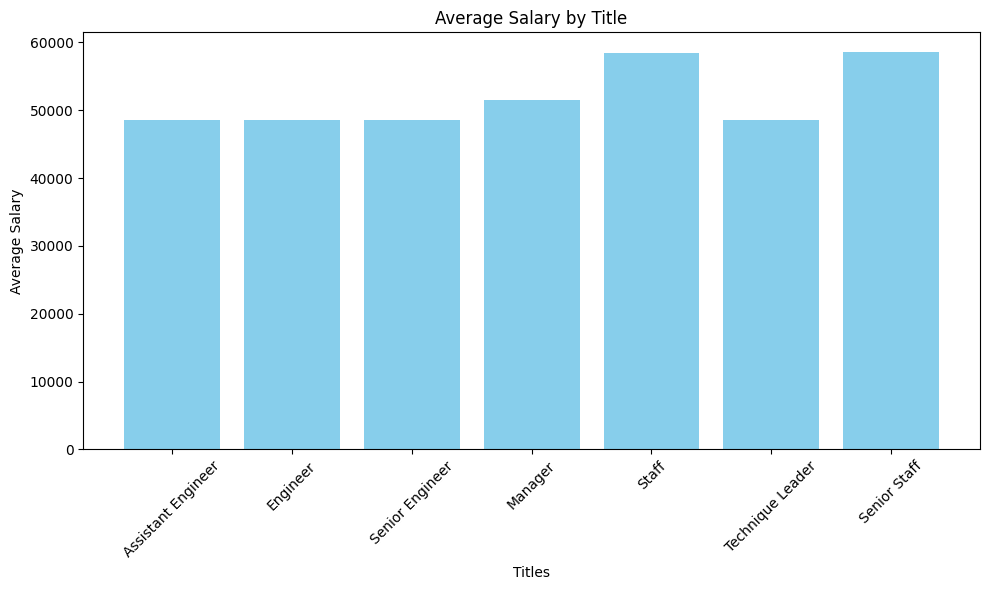

In [25]:
plt.figure(figsize=(10, 6))        # Set the figure size
plt.bar(salary_title_data['title'], salary_title_data['average_salary'], color='skyblue')
plt.xlabel('Titles')
plt.ylabel('Average Salary')
plt.title('Average Salary by Title')
plt.xticks(rotation=45)            # Rotate x-axis labels for better readability
plt.tight_layout()                 # Adjust layout to fit labels
plt.show()